In [1]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout , TimeDistributed , Conv1D , MaxPooling1D , Flatten , Bidirectional
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/ETH-USD (BaoCao).csv")

In [3]:
df1 = df.iloc[:,4:5]

In [4]:
df1

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1915,3840.256348
1916,3763.196533
1917,3746.849609
1918,3760.026611


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)

In [6]:
train_size=int(len(df1)*0.7)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [7]:
def makeFeature(data,feature=100):
    x = list()
    y = list()
    for i in range(len(data)-feature-1):
        x.append(data[i:(i + feature),0])
        y.append(data[i + feature,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [8]:
x_train,y_train = makeFeature(train_data)

In [9]:
x_test,y_test = makeFeature(test_data)

In [10]:
x_train.shape[0]

1243

In [11]:
x_train.shape[1]

100

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],1,100,1))

In [13]:
x_test = np.reshape(x_test,(x_test.shape[0],1,100,1))

In [14]:
model = Sequential([
    TimeDistributed(Conv1D(filters = 6,kernel_size = 3, activation = 'relu'),input_shape=(None, 100, 1)),
    TimeDistributed(MaxPooling1D()),
    TimeDistributed(Flatten()),
    LSTM(100,return_sequences=False,input_shape=(x_train.shape[1],1)),
    Dropout(0.42),
    Dense(1)
])
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
stock_price = model.fit(x_train,y_train,epochs=100,batch_size=24,verbose=1)

Epoch 1/100
52/52 [==============================] - 3s 7ms/step - loss: 0.0252
Epoch 2/100
52/52 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 3/100
52/52 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 4/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 5/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 6/100
52/52 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 7/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 8/100
52/52 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 9/100
52/52 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 10/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 11/100
52/52 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 12/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 13/100
52/52 [=================

In [16]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

15/15 [==============================] - 0s 4ms/step


In [17]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [18]:
test_rmse = np.sqrt(np.mean((test_predict - y_test)**2))
test_mape = np.mean(np.abs((y_test - test_predict) / y_test)) * 100
test_mse = np.mean((np.array(y_test) - np.array(test_predict))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 2245.3237211842643
Testing MAPE: 517441.2614011474
Testing MSE: 5041478.612912752


In [19]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [20]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [21]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

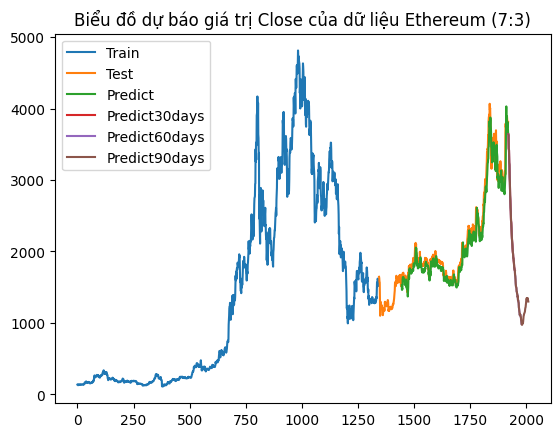

In [22]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(test_predict))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Ethereum (7:3)")
plt.show()

In [23]:
train_size_82=int(len(df1)*0.8)
test_size_82=len(df1)-train_size_82
train_data_82,test_data_82=df1[0:train_size_82,:],df1[train_size_82:len(df1),:1]

In [24]:
x_train_82,y_train_82 = makeFeature(train_data_82)

In [25]:
x_test_82, y_test_82 = makeFeature(test_data_82)

In [26]:
x_train_82 = np.reshape(x_train_82,(x_train_82.shape[0],1,100,1))

In [27]:
x_test_82 = np.reshape(x_test_82,(x_test_82.shape[0],1,100,1))

In [28]:
model.fit(x_train_82,y_train_82,epochs=100,batch_size=24,verbose=1)

Epoch 1/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 4/100
60/60 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 8/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 9/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 10/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 11/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 12/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 13/100
60/60 [===============

In [29]:
train_predict_82=model.predict(x_train_82)
test_predict_82=model.predict(x_test_82)

9/9 [==============================] - 0s 4ms/step


In [30]:
train_predict_82=scaler.inverse_transform(train_predict_82)
test_predict_82=scaler.inverse_transform(test_predict_82)

In [31]:
test_rmse = np.sqrt(np.mean((test_predict_82 - y_test_82)**2))
test_mape = np.mean(np.abs((y_test_82 - test_predict_82) / y_test_82)) * 100
test_mse = np.mean((np.array(y_test_82) - np.array(test_predict_82))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 2638.193756092802
Testing MAPE: 544521.0459616825
Testing MSE: 6960066.294687047


In [32]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [33]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [34]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

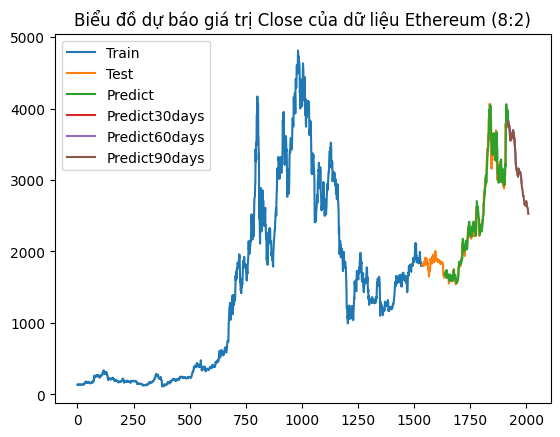

In [35]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(test_predict_82))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Ethereum (8:2)")
plt.show()

In [36]:
train_size_91=int(len(df1)*0.9)
test_size_91=len(df1)-train_size_91
train_data_91,test_data_91=df1[0:train_size_91,:],df1[train_size_91:len(df1),:1]

In [37]:
x_train_91,y_train_91 = makeFeature(train_data_91)

In [38]:
x_test_91, y_test_91 = makeFeature(test_data_91)

In [39]:
x_train_91 = np.reshape(x_train_91,(x_train_91.shape[0],1,100,1))

In [40]:
x_test_91 = np.reshape(x_test_91,(x_test_91.shape[0],1,100,1))

In [41]:
model.fit(x_train_91,y_train_91,epochs=100,batch_size=24,verbose=1)

Epoch 1/100
68/68 [==============================] - 0s 6ms/step - loss: 9.5109e-04
Epoch 2/100
68/68 [==============================] - 0s 6ms/step - loss: 9.2516e-04
Epoch 3/100
68/68 [==============================] - 0s 6ms/step - loss: 9.1309e-04
Epoch 4/100
68/68 [==============================] - 1s 9ms/step - loss: 8.8825e-04
Epoch 5/100
68/68 [==============================] - 1s 9ms/step - loss: 9.5193e-04
Epoch 6/100
68/68 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 7/100
68/68 [==============================] - 0s 6ms/step - loss: 9.7898e-04
Epoch 8/100
68/68 [==============================] - 0s 6ms/step - loss: 9.4182e-04
Epoch 9/100
68/68 [==============================] - 0s 6ms/step - loss: 9.0124e-04
Epoch 10/100
68/68 [==============================] - 0s 6ms/step - loss: 9.2618e-04
Epoch 11/100
68/68 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 12/100
68/68 [==============================] - 0s 6ms/step - loss: 8.8740e-

In [42]:
train_predict_91=model.predict(x_train_91)
test_predict_91=model.predict(x_test_91)

3/3 [==============================] - 0s 4ms/step


In [43]:
train_predict_91=scaler.inverse_transform(train_predict_91)
test_predict_91=scaler.inverse_transform(test_predict_91)

In [44]:
test_rmse = np.sqrt(np.mean((test_predict_91 - y_test_91)**2))
test_mape = np.mean(np.abs((y_test_91 - test_predict_91) / y_test_91)) * 100
test_mse = np.mean((np.array(y_test_91) - np.array(test_predict_91))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 3335.643971565384
Testing MAPE: 479734.57021793
Testing MSE: 11126520.705040488


In [45]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [46]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [47]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

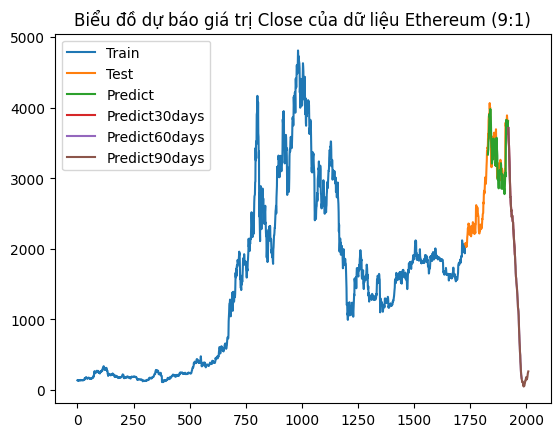

In [48]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(test_predict_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Ethereum (9:1)")
plt.show()